<a href="https://colab.research.google.com/github/Soedirman-Machine-Learning/dl-time-series-forecasting/blob/main/LSTM_Univariat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/Soedirman-Machine-Learning/dl-time-series-forecasting

Cloning into 'dl-time-series-forecasting'...
remote: Enumerating objects: 72, done.
remote: Counting objects: 100% (72/72), done.
remote: Compressing objects: 100% (70/70), done.
remote: Total 72 (delta 30), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (72/72), done.


In [2]:
!pip install sklearn
!pip install "statsmodels==0.11.1"
!pip install "scikit-learn==0.24"

     |████████████████████████████████| 8.7 MB 3.5 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
     |████████████████████████████████| 22.3 MB 107 kB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [3]:
import math
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/Soedirman-Machine-Learning/dl-time-series-forecasting/main/dataset_univariat.csv')
data

,y
0,0.180295
1,0.177124
2,0.173618
3,0.171640
4,0.166972
...,...
2389,0.188976
2390,0.178992
2391,0.169742
2392,0.159023


Text(0, 0.5, 'nilai y')

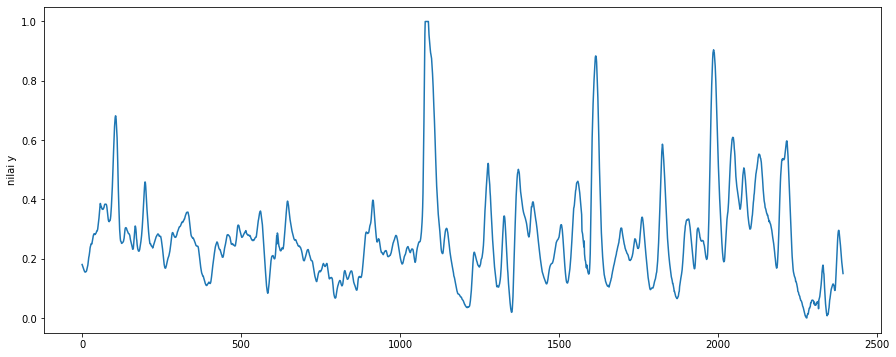

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6))
plt.plot(data)
plt.ylabel('nilai y')

In [7]:
train_size = 1912
train_df, test_df = data.iloc[:train_size, :], data.iloc[train_size:, :]
test_df.shape

(482, 1)

In [8]:
train = data.iloc[:len(data)-179]
test = data.iloc[len(data)-479:]
train_data_ts_log = np.log10(train['y'])
test.shape

(479, 1)

In [9]:
def create_data(data, look_back=1):
    m = len(data)
    X = []
    y = []
    for i in range(look_back, m):
        X.append(data[i - look_back: i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

In [10]:
look_back = 3
X_train, y_train = create_data(train_df.values, look_back=look_back)
X_test, y_test = create_data(test_df.values, look_back=look_back)

In [11]:
from keras.models import Sequential
from keras.layers import Dense

In [12]:
model = Sequential()
model.add(Dense(12, input_dim=look_back, activation='relu'))
model.add(Dense(18, activation='relu'))
model.add(Dense(1))

In [13]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=2, verbose=2)

Epoch 1/100
955/955 - 2s - loss: 0.0016 - 2s/epoch - 2ms/step
Epoch 2/100
955/955 - 1s - loss: 5.9604e-04 - 1s/epoch - 1ms/step
Epoch 3/100
955/955 - 1s - loss: 4.2143e-04 - 1s/epoch - 1ms/step
Epoch 4/100
955/955 - 1s - loss: 2.6002e-04 - 1s/epoch - 1ms/step
Epoch 5/100
955/955 - 1s - loss: 1.1474e-04 - 1s/epoch - 1ms/step
Epoch 6/100
955/955 - 1s - loss: 5.1885e-05 - 1s/epoch - 1ms/step
Epoch 7/100
955/955 - 1s - loss: 4.9701e-05 - 1s/epoch - 1ms/step
Epoch 8/100
955/955 - 1s - loss: 5.0007e-05 - 1s/epoch - 1ms/step
Epoch 9/100
955/955 - 1s - loss: 6.7641e-05 - 1s/epoch - 1ms/step
Epoch 10/100
955/955 - 1s - loss: 4.9125e-05 - 1s/epoch - 1ms/step
Epoch 11/100
955/955 - 1s - loss: 4.9566e-05 - 1s/epoch - 1ms/step
Epoch 12/100
955/955 - 1s - loss: 4.8944e-05 - 1s/epoch - 1ms/step
Epoch 13/100
955/955 - 1s - loss: 5.3263e-05 - 1s/epoch - 1ms/step
Epoch 14/100
955/955 - 1s - loss: 5.0874e-05 - 1s/epoch - 1ms/step
Epoch 15/100
955/955 - 1s - loss: 4.7079e-05 - 1s/epoch - 1ms/step
Epoch 16

In [14]:
score = model.evaluate(X_test, y_test)
print('Test rmse:', math.sqrt(score))


15/15 [==============================] - 0s 2ms/step - loss: 1.1145e-04
Test rmse: 0.010557204145685038


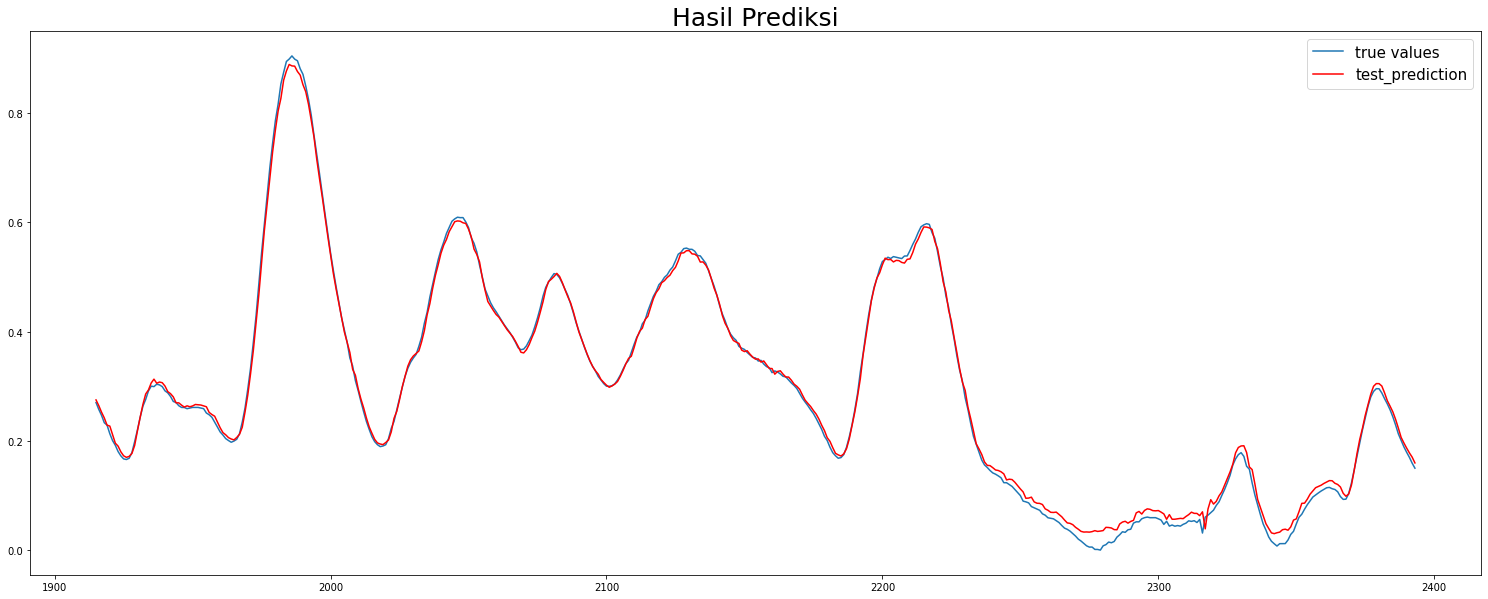

In [15]:
plt.figure(figsize=(26,10))
train_prediction = model.predict(X_train)
train_stamp = np.arange(look_back, look_back + X_train.shape[0])
test_prediction = model.predict(X_test)
test_stamp = np.arange(2 * look_back + X_train.shape[0], len(data))
plt.plot(test, label='true values')
plt.plot(test_stamp, test_prediction, label = 'test_prediction', color="red")
plt.title('Hasil Prediksi', fontsize=25)
plt.legend(fontsize=15);
plt.title("Hasil Prediksi", fontsize=25)
plt.legend(fontsize=15);